In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.preprocessing import OneHotEncoder ,RobustScaler
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv('Flight_Fare.csv')
flights


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
flights.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
flights

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
new_columns = []
for c in flights.columns:
    new_columns.append(c.replace(' ', '_'))

flights.columns = new_columns

flights.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
flights.drop(columns = ['flight'], inplace = True)


In [8]:
column_list = flights.columns.tolist()

print(column_list)

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [9]:
flights

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
exchange_rate = 0.012

flights['dollars'] = (flights['price'] * exchange_rate)


In [11]:
flights

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dollars
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.436
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.436
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.472
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.460
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.460
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,831.180
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,925.260
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,949.188
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,979.020


In [12]:
flights.drop(columns = ['price'], inplace = True)

In [13]:
flights

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,dollars
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71.436
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71.436
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71.472
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71.460
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71.460
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,831.180
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,925.260
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,949.188
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,979.020


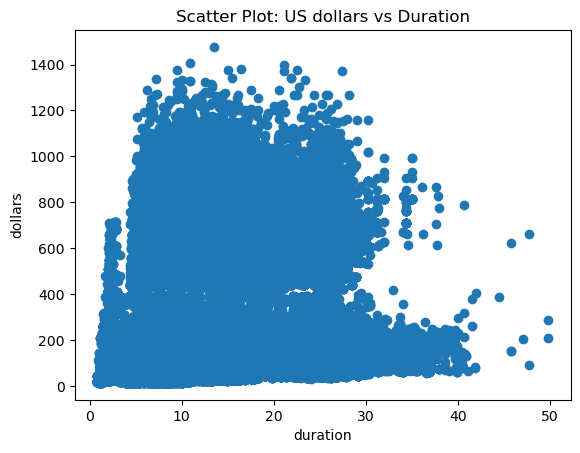

In [14]:
# Scatterplot
plt.scatter(flights['duration'],flights['dollars'])
plt.xlabel('duration')
plt.ylabel('dollars')
plt.title('Scatter Plot: US dollars vs Duration')
plt.show()

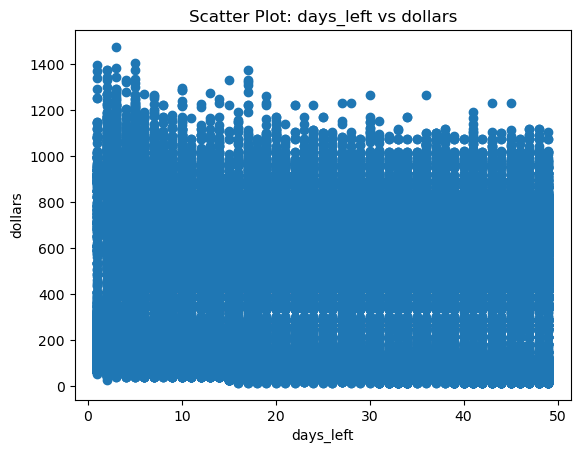

In [15]:
plt.scatter(flights['days_left'],flights['dollars'])
plt.xlabel('days_left')
plt.ylabel('dollars')
plt.title('Scatter Plot: days_left vs dollars')
plt.show()

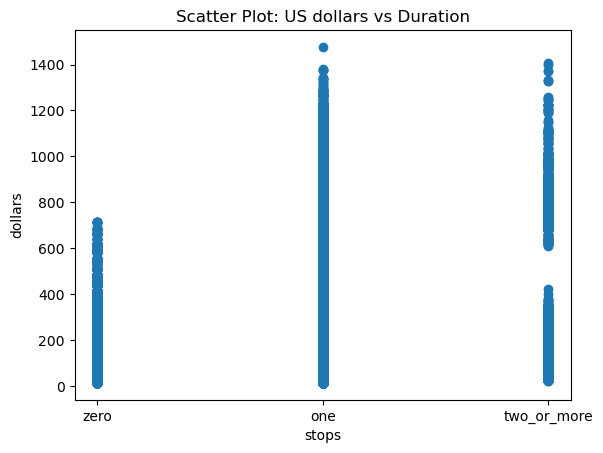

In [16]:
plt.scatter(flights['stops'],flights['dollars'])
plt.xlabel('stops')
plt.ylabel('dollars')
plt.title('Scatter Plot: US dollars vs Duration')
plt.show()

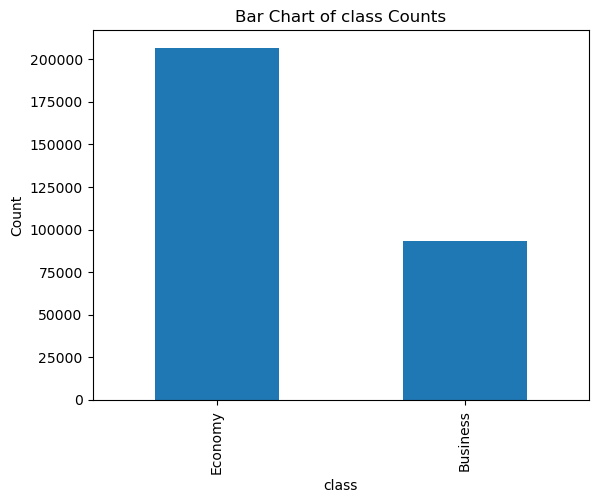

In [17]:
counts = flights['class'].value_counts()

# Create bar chart
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Bar Chart of class Counts')

# Show the plot
plt.show()

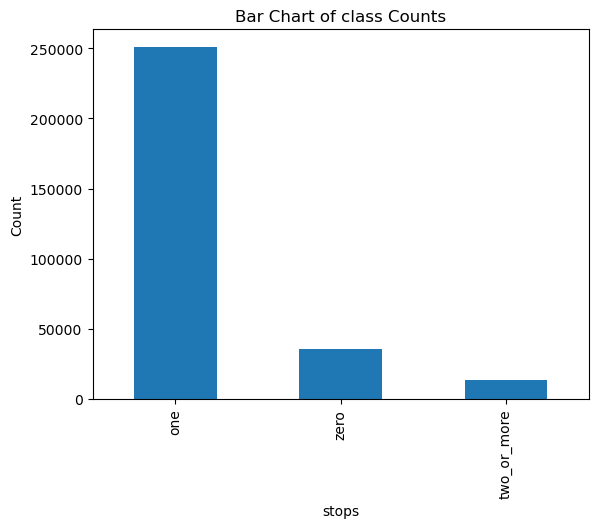

In [18]:
counts = flights['stops'].value_counts()

# Create bar chart
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('stops')
plt.ylabel('Count')
plt.title('Bar Chart of class Counts')

# Show the plot
plt.show()

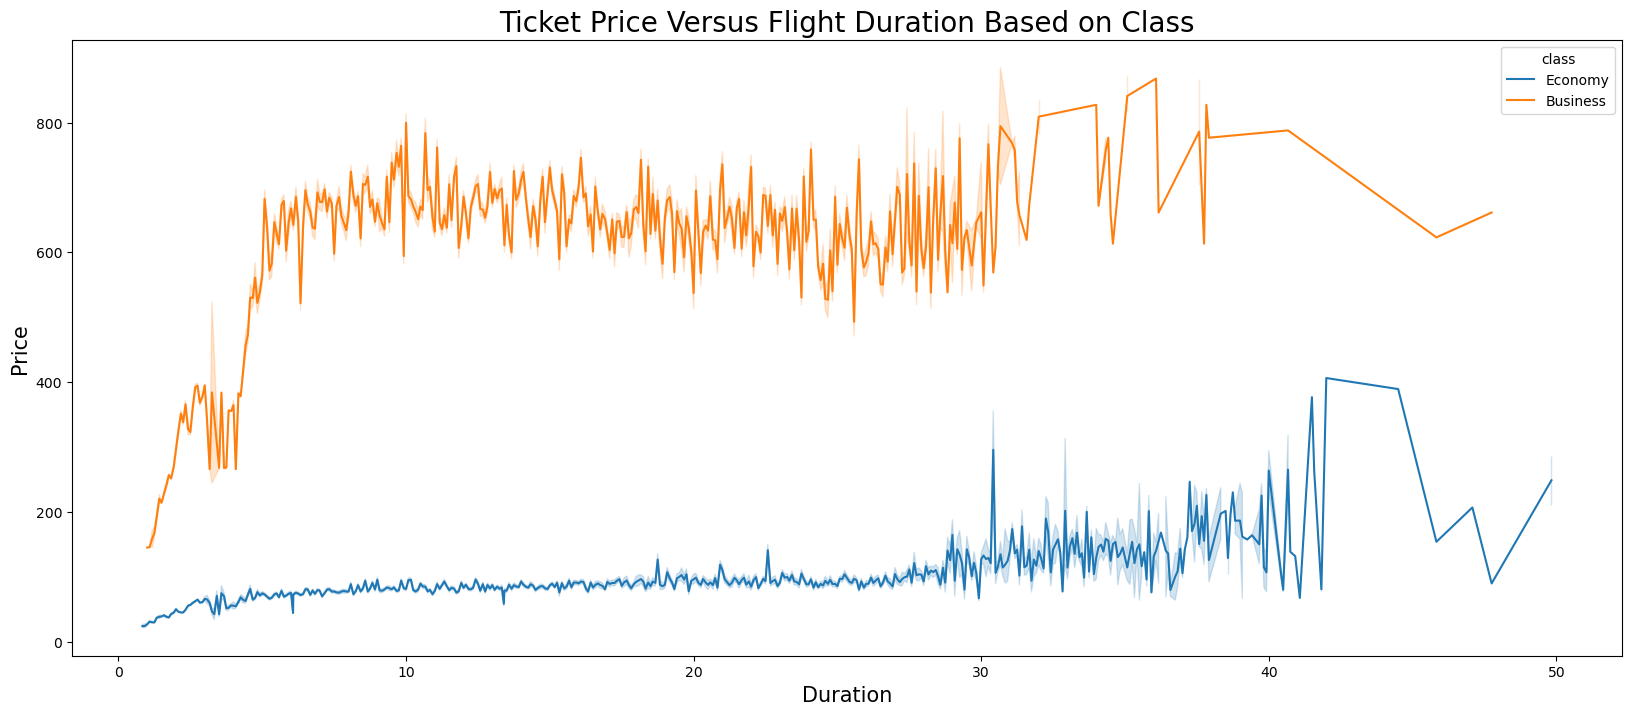

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=flights,x='duration',y='dollars',hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [20]:
grouped_data = flights.groupby(['destination_city', 'class']).sum().unstack()
grouped_data

airline  \
class                                                      Business   
destination_city                                                      
Bangalore         Air_IndiaAir_IndiaAir_IndiaAir_IndiaAir_IndiaV...   
Chennai           Air_IndiaVistaraAir_IndiaAir_IndiaAir_IndiaAir...   
Delhi             Air_IndiaAir_IndiaAir_IndiaAir_IndiaVistaraVis...   
Hyderabad         Air_IndiaAir_IndiaVistaraVistaraAir_IndiaAir_I...   
Kolkata           Air_IndiaAir_IndiaVistaraAir_IndiaAir_IndiaAir...   
Mumbai            Air_IndiaAir_IndiaAir_IndiaAir_IndiaAir_IndiaV...   

                                                                     \
class                                                       Economy   
destination_city                                                      
Bangalore         SpiceJetAirAsiaVistaraVistaraVistaraVistaraVis...   
Chennai           SpiceJetVistaraVistaraIndigoIndigoAir_IndiaAir...   
Delhi             VistaraVistaraGO_FIRSTIndigoIndigoAir_IndiaAir...   
Hyderabad         VistaraIndigoIndigoIndigoAir_IndiaAir_IndiaAir...   
Kolkata           GO_FIRSTGO_FIRSTIndigoIndigoGO_FIRSTGO_FIRSTIn...   
Mumbai            SpiceJetSpiceJetAirAsiaVistaraVistaraVistaraVi...   

                                                        source_city  \
class                                                      Business   
destination_city                                                      
Bangalore         DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Chennai           DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Delhi             MumbaiMumbaiMumbaiMumbaiMumbaiMumbaiMumbaiMumb...   
Hyderabad         DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Kolkata           DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Mumbai            DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   

                                                                     \
class                                                       Economy   
destination_city                                                      
Bangalore         DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Chennai           DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Delhi             MumbaiMumbaiMumbaiMumbaiMumbaiMumbaiMumbaiMumb...   
Hyderabad         DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Kolkata           DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Mumbai            DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   

                                                     departure_time  \
class                                                      Business   
destination_city                                                      
Bangalore         EveningNightNightEveningEveningEveningEveningE...   
Chennai           NightEveningEveningNightEveningEveningEveningE...   
Delhi             EveningNightEveningEveningEveningEveningNightN...   
Hyderabad         EveningNightNightEveningEveningNightEveningNig...   
Kolkata           NightEveningEveningNightEveningNightEveningNig...   
Mumbai            EveningEveningEveningNightEveningEveningNightE...   

                                                                     \
class                                                       Economy   
destination_city                                                      
Bangalore         Early_MorningMorningMorningMorningAfternoonEve...   
Chennai           Early_MorningEarly_MorningAfternoonMorningAfte...   
Delhi             MorningEveningEveningEveningAfternoonEveningNi...   
Hyderabad         MorningMorningMorningAfternoonMorningMorningEv...   
Kolkata           Early_MorningEveningEarly_MorningEarly_Morning...   
Mumbai            EveningEarly_MorningEarly_MorningMorningMornin...   

                                                              stops  \
class                                                      Business   
destination_city                                                      
Bangalo

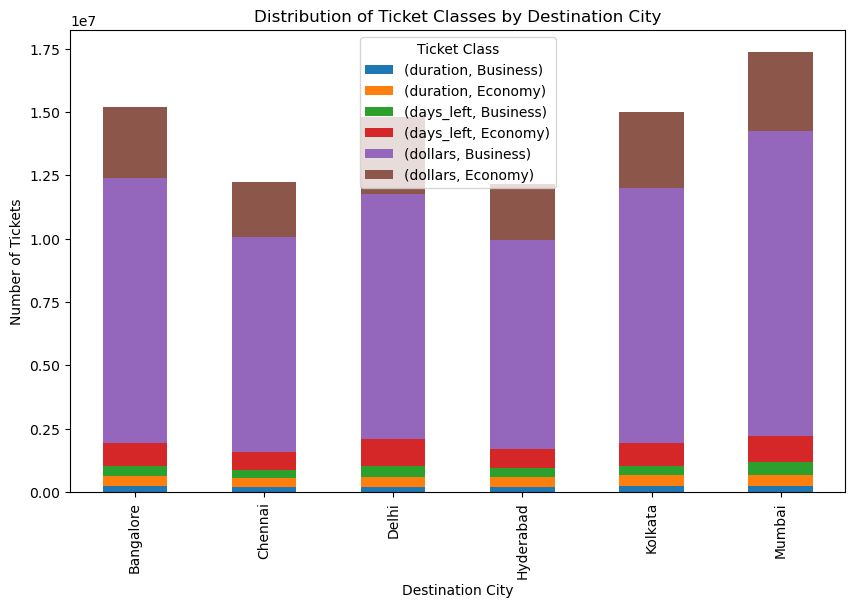

In [21]:
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Destination City')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Ticket Classes by Destination City')

# Show plot
plt.legend(title='Ticket Class')
plt.show()

In [22]:
df = flights.groupby(['airline', 'class']).sum().unstack()
df

source_city  \
class                                               Business   
airline                                                        
AirAsia                                                  NaN   
Air_India  DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
GO_FIRST                                                 NaN   
Indigo                                                   NaN   
SpiceJet                                                 NaN   
Vistara    DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   

                                                              \
class                                                Economy   
airline                                                        
AirAsia    DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Air_India  DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
GO_FIRST   DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Indigo     DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
SpiceJet   DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   
Vistara    DelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiDelhiD...   

                                              departure_time  \
class                                               Business   
airline                                                        
AirAsia                                                  NaN   
Air_India  EveningEveningEveningNightEveningNightEveningN...   
GO_FIRST                                                 NaN   
Indigo                                                   NaN   
SpiceJet                                                 NaN   
Vistara    EveningNightEveningEveningEveningEveningEvenin...   

                                                              \
class                                                Economy   
airline                                                        
AirAsia    Early_MorningEveningEveningMorningEveningEarly...   
Air_India  Early_MorningEarly_MorningEveningEarly_Morning...   
GO_FIRST   Early_MorningAfternoonAfternoonMorningEarly_Mo...   
Indigo     Early_MorningMorningAfternoonMorningMorningEve...   
SpiceJet   EveningEarly_MorningEveningEveningEveningEveni...   
Vistara    MorningMorningMorningMorningAfternoonAfternoon...   

                                                       stops  \
class                                               Business   
airline                                                        
AirAsia                                                  NaN   
Air_India  zerozerooneoneoneoneoneoneoneoneoneoneoneoneon...   
GO_FIRST                                                 NaN   
Indigo                                                   NaN   
SpiceJet                                                 NaN   
Vistara    zeroonezerooneoneoneoneoneoneoneoneoneoneoneon...   

                                                              \
class                                                Economy   
airline                                                        
AirAsia    zerooneoneoneonezerooneoneonezerooneoneonezero...   
Air_India  zerozerooneoneoneoneoneoneoneoneoneoneoneoneon...   
GO_FIRST   zerozerozerozerooneoneoneoneoneoneoneonezeroze...   
Indigo     zerozerozerozerozerozerozerooneoneoneoneoneone...   
SpiceJet   zerozerozerooneoneoneonezerozerozerooneoneoneo...   
Vistara    zerozerozerozerozerozerooneoneoneoneonezeroone...   

                                                arrival_time  \
class                                               Business   
airline                                                        
AirAsia                                                  NaN   
Air_India  EveningNightNightNightNightAfternoonEveningMor...   
GO_FIRST                                                 NaN   
Indigo                                                   NaN   
SpiceJet                                                 NaN   
Vistara    NightAfternoonNightNightMorningNightMorningNig...   

          

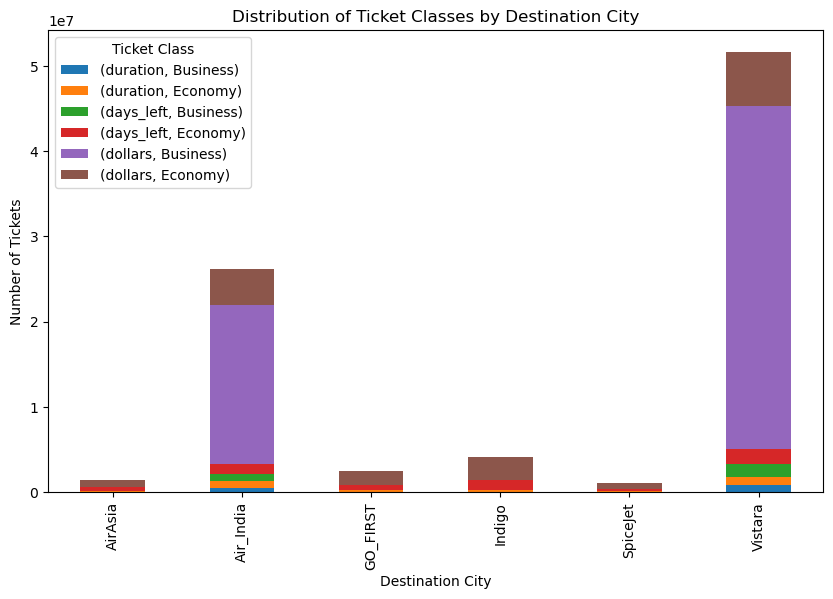

In [23]:
df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Destination City')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Ticket Classes by Destination City')

# Show plot
plt.legend(title='Ticket Class')
plt.show()

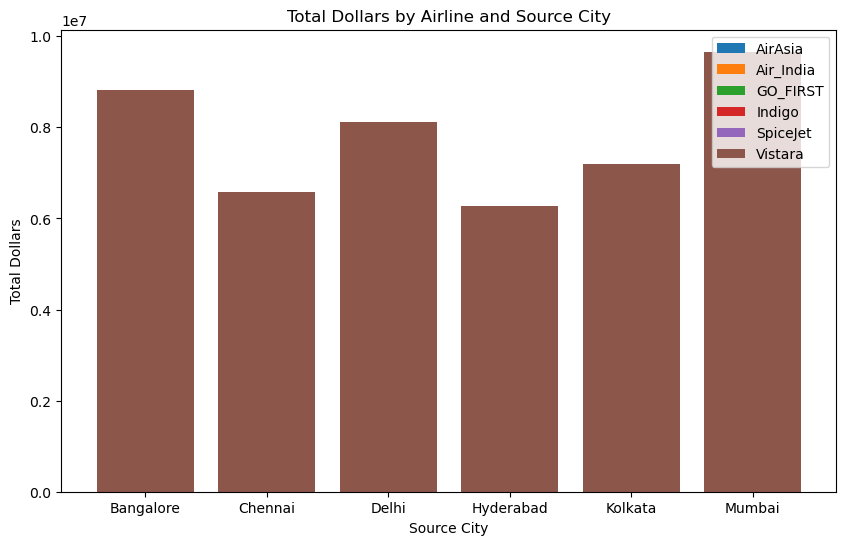

In [24]:
airlines = flights.groupby(['airline', 'source_city'])['dollars'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
for airline in airlines['airline'].unique():
    subset = airlines[airlines['airline'] == airline]
    plt.bar(subset['source_city'], subset['dollars'], label=airline)

plt.xlabel('Source City')
plt.ylabel('Total Dollars')
plt.title('Total Dollars by Airline and Source City')
plt.legend()
plt.show()

In [25]:
from scipy.stats import zscore

# Calculate Z-scores
flights['Z_Score'] = zscore(flights['duration'])

# Filter outliers
df_filtered = flights[flights['Z_Score'].abs() <= 3]
df_filtered

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,dollars,Z_Score
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71.436,-1.397531
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71.436,-1.375284
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71.472,-1.397531
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71.460,-1.386407
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71.460,-1.375284
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,831.180,-0.297695
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,925.260,-0.250421
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,949.188,0.223718
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,979.020,-0.308819


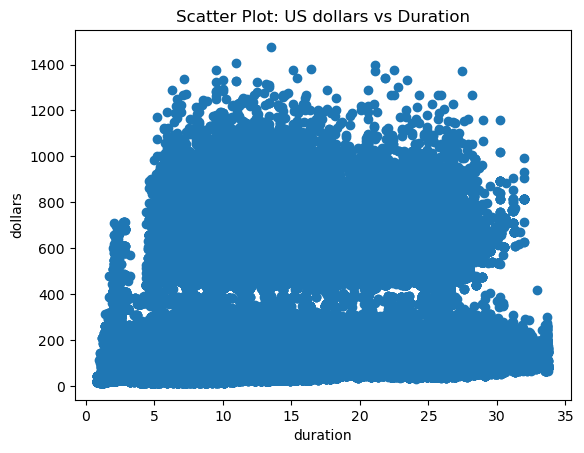

In [26]:
plt.scatter(df_filtered['duration'],df_filtered['dollars'])
plt.xlabel('duration')
plt.ylabel('dollars')
plt.title('Scatter Plot: US dollars vs Duration')
plt.show()

In [27]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299431 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299431 non-null  object 
 1   source_city       299431 non-null  object 
 2   departure_time    299431 non-null  object 
 3   stops             299431 non-null  object 
 4   arrival_time      299431 non-null  object 
 5   destination_city  299431 non-null  object 
 6   class             299431 non-null  object 
 7   duration          299431 non-null  float64
 8   days_left         299431 non-null  int64  
 9   dollars           299431 non-null  float64
 10  Z_Score           299431 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 27.4+ MB


In [28]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   dollars           300153 non-null  float64
 10  Z_Score           300153 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [29]:
flight_status = df_filtered.drop(['Z_Score'], axis = True)

In [30]:
flight_status

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,dollars
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,71.436
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,71.436
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,71.472
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,71.460
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,71.460
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,831.180
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,925.260
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,949.188
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,979.020


In [31]:
num_nans = flight_status.isna().sum()
num_nans

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dollars             0
dtype: int64

In [32]:
flight_pred = pd.DataFrame(flight_status)

# Separate features (X) and target variable (y)
X = flight_status[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']]
y = flight_status['dollars']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes of training and testing sets:
X_train: (239544, 9)
X_test: (59887, 9)
y_train: (239544,)
y_test: (59887,)


In [33]:
# Define the preprocessing steps for numerical and categorical data
numeric_features = ['duration', 'days_left']
numeric_transformer = StandardScaler()
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
categorical_transformer = OneHotEncoder(drop='first')  

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data, then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 6608.2335637394
R^2 Score: 0.9105275221250047


In [34]:
df2 = flights
column=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

df2[column] = df2[column].apply(LabelEncoder().fit_transform)
x=df2.drop(['dollars'],axis=1)
y=df2['dollars']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train size',x_train.shape)
print('y_train size',y_train.shape)
print('x_test size',x_test.shape)
print('y_test size',y_test.shape)

x_train size (240122, 10)
y_train size (240122,)
x_test size (60031, 10)
y_test size (60031,)


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)  
model.fit(x_train, y_train)

y_pred2 = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Random Forest Regression Results:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Random Forest Regression Results:
Mean Squared Error: 1118.4422787940296
R^2 Score: 0.9849326336371773


In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_model = SVR(kernel='linear')
svm_model.fit(x_train, y_train)
y_pred3 = svm_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred3)
r3 = r2_score(y_test, y_pred3)
print("Mean Squared Error:", mse)
print(f"R^2 Score: {r3}")

Mean Squared Error: 7557.682114415242
R^2 Score: 0.8981848527807508


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model = Lasso(alpha=0.1, random_state=42) 

lasso_model.fit(x_train, y_train)
y_pred4 = lasso_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred4)
r4 = r2_score(y_test, y_pred4)
print("Mean Squared Error:", mse)
print(f"R^2 Score: {r4}")

Mean Squared Error: 7084.74906922515
R^2 Score: 0.9045560849775951
